<a href="https://colab.research.google.com/github/carolsombrioo/sigmoidal_data_science/blob/main/Analisando_os_Dados_do_Airbnb_ipynb_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Quebec - Canadá*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/qc/quebec-city/2023-07-06/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - Número do id para identificar o imóvel
* name - Nome da Propriedade anunciada
* hot_id - Número de id do proprietário da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - Não possui valores válidos
* neighbourhood - Nome do bairro
* latitude - Coordenada da latitude da propriedade
* longitude - Coordenada da longitude da propriedade
* room_type - Informa o tipo de quarto que é oferecido
* price - Preço para alugar o imóvel
* minimum_nights - Quantidade mínima de noites para reservar
* number_of_reviews - Número de reviews que a propriedade possui
* last_review - Data do último review
* reviews_per_month - Quantidade de reviews por mês
* calculated_host_listings_count - Quantidade de imóveis do mesmo anfitrião
* availability_365 - Número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm - Quantidade de avaliações nos últimos 12 meses
* license - Número de registro do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,138381,Bed and breakfast in Quebec · ★4.91 · 1 bedroo...,675584,Mary,NaN,Sillery,46.76851,-71.26804,Private room,185,2,175,2022-09-05,1.19,3,337,7,NaN
1,198548,Rental unit in Quebec · ★4.75 · 1 bedroom · 1 ...,960772,Marianne,NaN,Saint-Roch,46.81169,-71.22522,Entire home/apt,150,31,56,2023-03-25,0.39,1,132,3,NaN
2,214967,Townhouse in Quebec · ★4.95 · 1 bedroom · 1 be...,1110010,Julie,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.80233,-71.21214,Private room,74,32,197,2023-04-15,1.49,1,356,22,NaN
3,348647,Bed and breakfast in Quebec · ★4.74 · 1 bedroo...,1764323,Gilles,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.81504,-71.20562,Private room,225,1,176,2023-07-03,1.28,2,75,17,NaN
4,361573,Bed and breakfast in Quebec · ★4.78 · 1 bedroo...,1764323,Gilles,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.81570,-71.20504,Private room,150,1,72,2022-09-18,0.53,2,50,2,125930


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 2190
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.281735
reviews_per_month                 0.142922
last_review                       0.142922
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

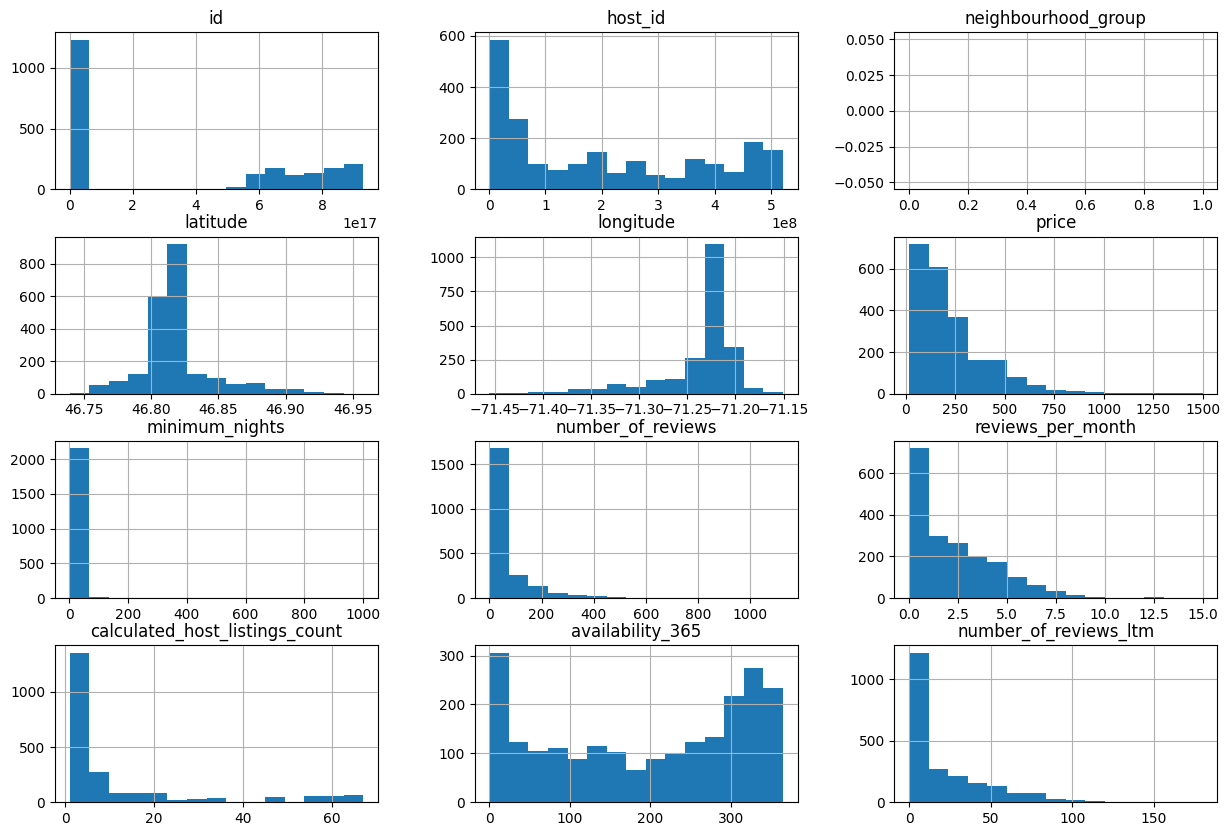

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

**Há outliers?**



Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price` e `minimum_nights`

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [7]:
# ver o resumo estatistico das variáveis númericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2190.000000,2190.000000,2190.000000,1877.000000,2190.000000,2190.000000
mean,227.486758,12.716895,56.523744,2.331257,11.132420,194.558904
std,188.238211,48.600997,92.511632,2.178857,17.712588,123.719159
min,17.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,100.000000,1.000000,3.000000,0.490000,1.000000,75.000000
50%,173.000000,2.000000,20.000000,1.710000,3.000000,217.000000
75%,296.500000,7.000000,68.000000,3.640000,10.000000,312.000000
max,1500.000000,1000.000000,1124.000000,15.000000,67.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 296, porém seu valor máximo é 1500.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

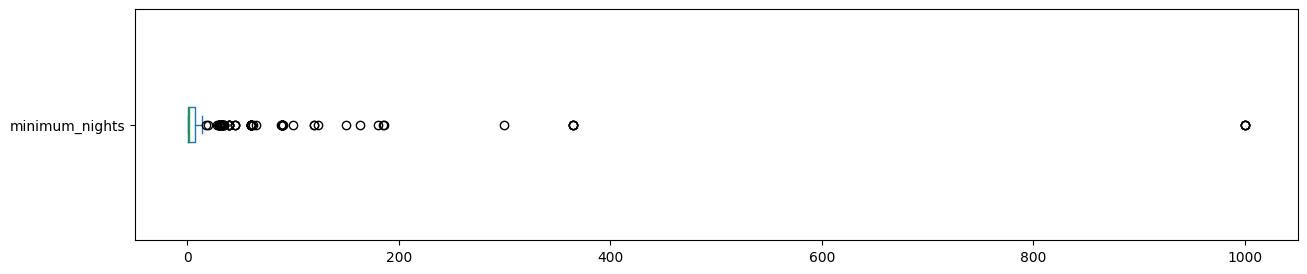

minimum_nights: valores acima de 30:
524 entradas
23.9269%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

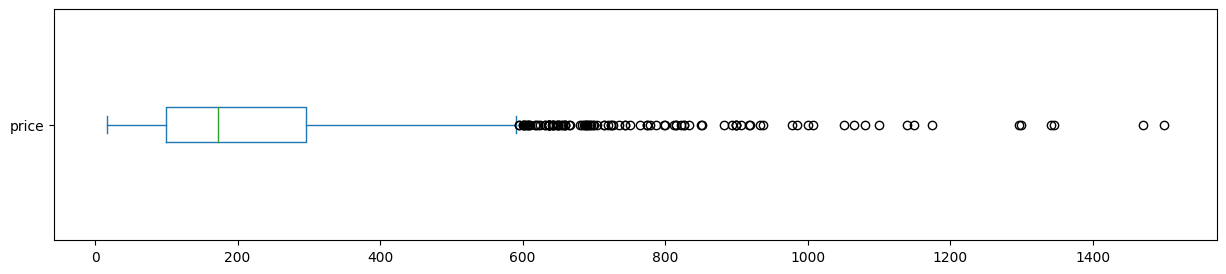


price: valores acima de 1000
14 entradas
0.6393%


In [9]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver a quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))



#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

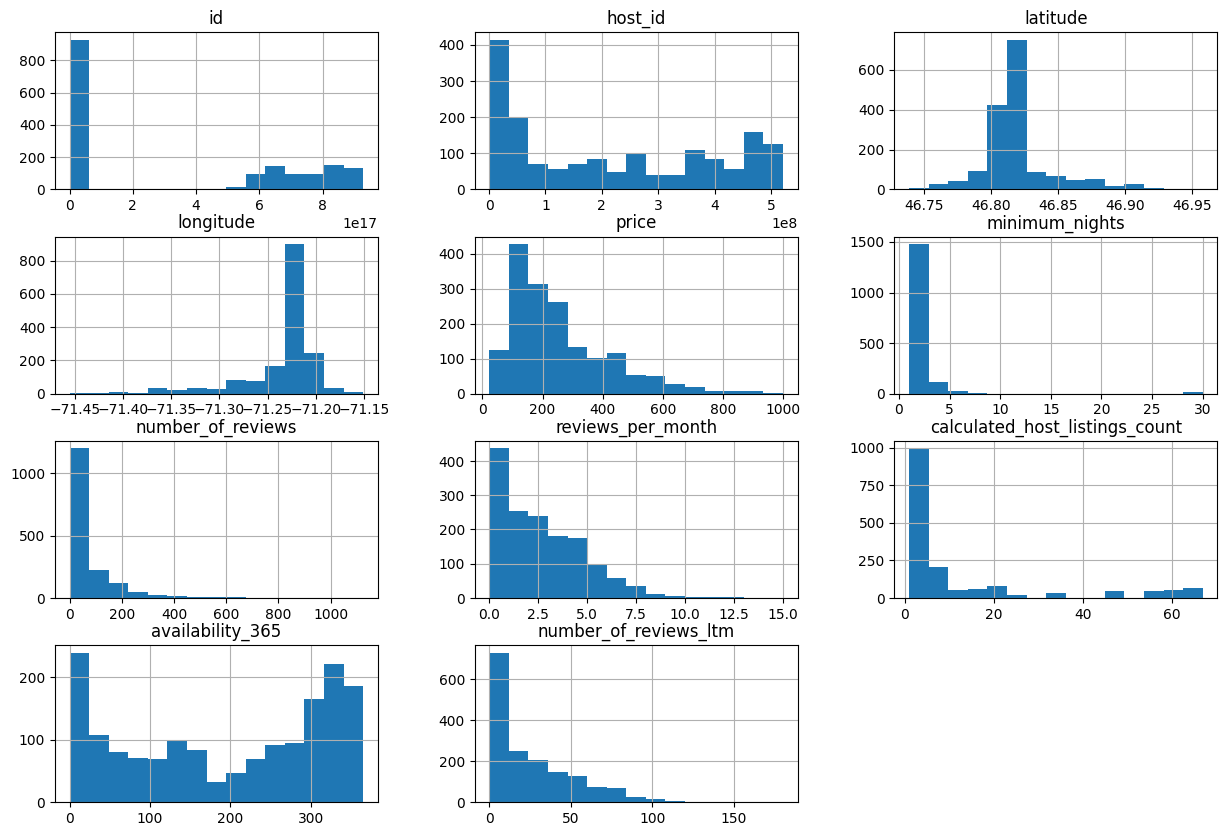

In [10]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover 'neighbour_group', porque está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [11]:
# ver a média da coluna `price``
df_clean.price.median()

208.0

### **Q4. Qual a correlação existente entre as variáveis**

In [12]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.086552,-0.167382,-0.219261,0.326200,0.220516
minimum_nights,-0.086552,1.000000,-0.067326,-0.102004,-0.033665,-0.064927
number_of_reviews,-0.167382,-0.067326,1.000000,0.505041,-0.158923,-0.092581
reviews_per_month,-0.219261,-0.102004,0.505041,1.000000,-0.247578,-0.082334
calculated_host_listings_count,0.326200,-0.033665,-0.158923,-0.247578,1.000000,0.411830
availability_365,0.220516,-0.064927,-0.092581,-0.082334,0.411830,1.000000


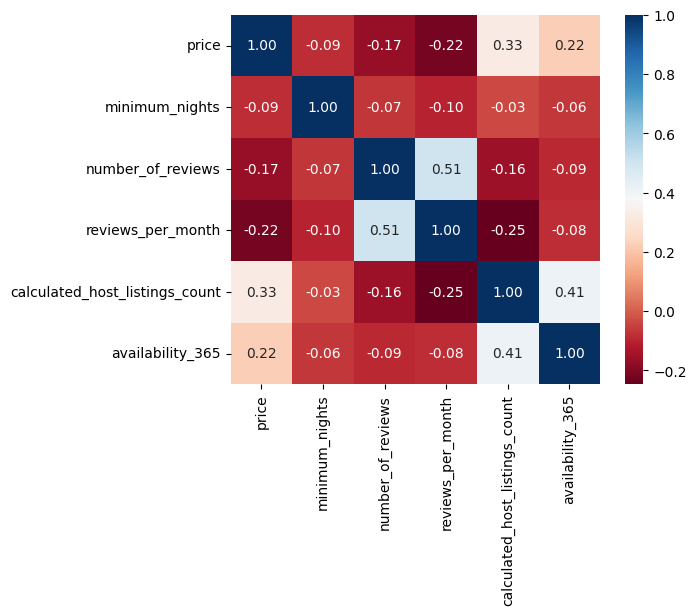

In [13]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    1433
Private room        188
Hotel room           21
Shared room          13
Name: room_type, dtype: int64

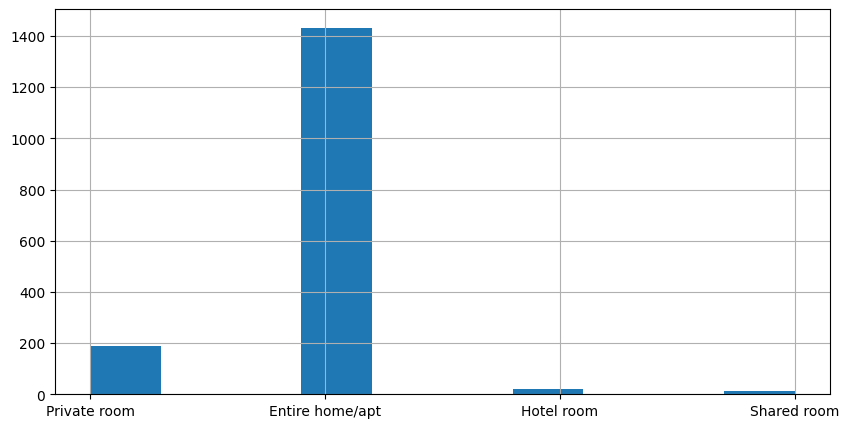

In [35]:
df_clean.room_type.hist(bins=10, figsize=(10,5));

In [37]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    65.433790
Private room        8.584475
Hotel room          0.958904
Shared room         0.593607
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [16]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vieux-Québec/Cap-Blanc/Colline parlementaire    378.702055
Pointe-de-Sainte-Foy                            338.000000
Saint-Roch                                      279.819599
Saint-Jean-Baptiste                             265.584416
Saint-Sacrement                                 249.333333
Quartier 4-6                                    246.200000
Cité Universitaire                              245.191176
Chutes-Montmorency                              239.461538
Quartier 5-2                                    226.111111
Montcalm                                        223.756757
Name: price, dtype: float64

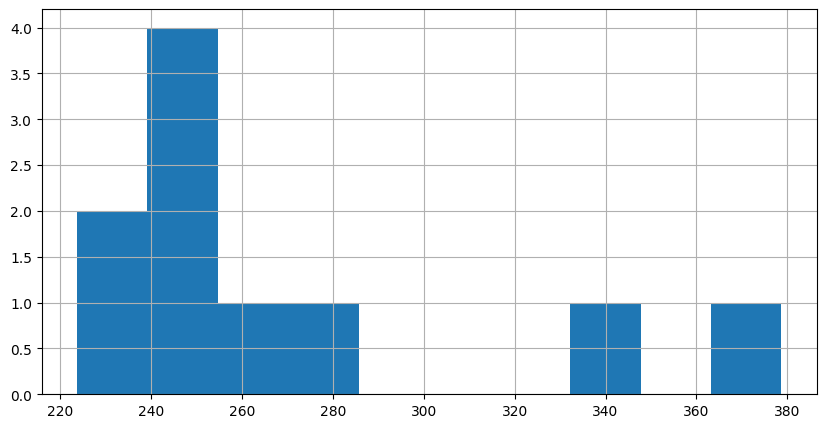

In [34]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].hist(bins=10, figsize=(10,5));

In [22]:
# ver quantidade de imóveis no Vieux-Québec/Cap-Blanc/Colline parlementaire
print(df_clean[df_clean.neighbourhood == "Vieux-Québec/Cap-Blanc/Colline parlementaire"].shape)

# ver as 3 entradas do Complexo do Montcalm
df_clean[df_clean.neighbourhood == "Montcalm"]

(292, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
17,1001559,Serviced apartment in Québec · ★4.93 · 2 bedro...,5508181,Simon,Montcalm,46.804500,-71.227130,Entire home/apt,554,2,30,2023-07-02,0.50,1,67,9,302754
132,10670777,Home in Ville de Québec · ★4.86 · 3 bedrooms ·...,55119023,Anne-Isabelle,Montcalm,46.801680,-71.223240,Entire home/apt,400,5,14,2023-01-06,0.17,1,5,4,301595
227,16617262,Rental unit in Ville de Québec · ★4.81 · 1 bed...,1125364,Martin,Montcalm,46.805200,-71.234720,Private room,146,1,562,2023-06-23,7.17,2,302,82,NaN
234,16837649,Rental unit in Ville de Québec · ★4.83 · 1 bed...,1125364,Martin,Montcalm,46.804160,-71.234460,Private room,112,1,529,2023-06-24,6.78,2,271,71,NaN
265,19154071,Guest suite in Ville de Québec · ★4.92 · 1 bed...,7719571,Martin,Montcalm,46.801100,-71.230670,Entire home/apt,140,3,111,2023-06-20,1.51,1,102,20,302261
328,23590978,Guesthouse in Ville de Québec · ★4.90 · 1 bedr...,35034527,Anny & Eric,Montcalm,46.800670,-71.232340,Private room,149,1,63,2023-06-28,1.03,6,242,4,150916
329,23597485,Guesthouse in Ville de Québec · ★4.96 · 1 bedr...,35034527,Anny & Eric,Montcalm,46.800670,-71.232340,Private room,155,1,82,2023-06-30,1.33,6,231,18,150916
330,23597619,Guesthouse in Ville de Québec · ★4.95 · 2 bedr...,35034527,Anny & Eric,Montcalm,46.800670,-71.232340,Private room,204,1,61,2023-06-21,0.99,6,233,12,150916
331,23608476,Rental unit in Ville de Québec · ★4.95 · 1 bed...,57307427,Laurence,Montcalm,46.800340,-71.238010,Entire home/apt,188,5,58,2023-06-14,0.95,1,164,12,301890
343,24229145,Guesthouse in Ville de Québec · ★4.89 · 2 bedr...,35034527,Anny & Eric,Montcalm,46.800670,-71.232340,Private room,204,1,27,2022-08-24,0.44,6,216,1,150916


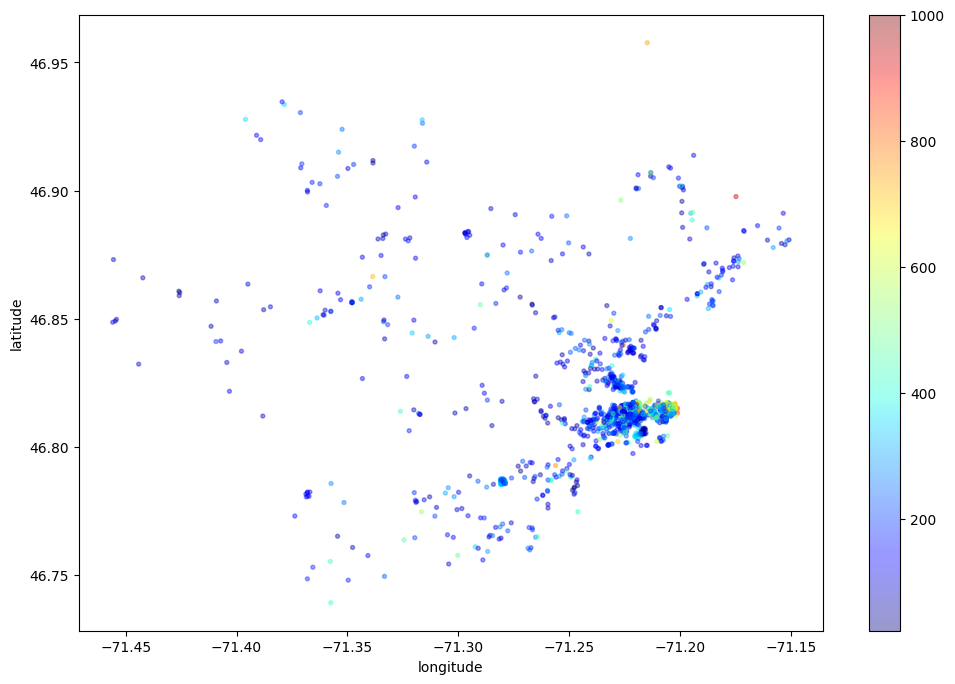

In [18]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [24]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.median()

1.0

## Conclusões




```

Foi feita uma análise mais superficial de dados disponibilizados pelo Airbnb na região de Quebec(Canadá). Com esses dados analisados, foram identificados presenças de outliers em price e minimum_nights.
Os dados apresentam que o tipo de imóvel mais alugado é casa inteira/apartamento com 65,43%, enquanto quartos privativos representam 8,5%.
Conforme os dados, a região mais cara é Vieux-Québec/Cap-Blanc/Colline parlementaire, sendo os valores de 378 CAD e logo abaixo o bairro Pointe-de-Sainte-Foy 338 CAD.
```

